Clean the data off outliers and null values

# Import packages

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.model_selection import train_test_split

# Load data

In [16]:
# Get all csv files from distilbert_data folder
path = '../datasets/distilbert_data/'
all_files = [file for file in os.listdir(path) if file.endswith('.csv')]
all_files

['NetCashProvidedByUsedInFinancingActivities.csv',
 'NetCashProvidedByUsedInInvestingActivities.csv',
 'EBIT.csv',
 'NetIncomeLoss.csv',
 'RevenueFromContractWithCustomerExcludingAssessedTax.csv',
 'EarningsPerShareDiluted.csv']

In [4]:
# Get all csv files from finbert_data folder
path = '../datasets/finbert_data/'
finbert_files = [file for file in os.listdir(path) if file.endswith('.csv')]
finbert_files

['NetCashProvidedByUsedInFinancingActivities.csv',
 'NetCashProvidedByUsedInInvestingActivities.csv',
 'EBIT.csv',
 'NetIncomeLoss.csv',
 'RevenueFromContractWithCustomerExcludingAssessedTax.csv',
 'EarningsPerShareDiluted.csv']

# Check and remove outliers --> train test split --> save these datasets in distilbert_data folder

In [3]:
# Suppress warnings
#pd.options.mode.chained_assignment = None
#warnings.filterwarnings("ignore", category=SettingWithCopyWarning)
warnings.filterwarnings("ignore", category=UserWarning)

Dataset: NetCashProvidedByUsedInFinancingActivities
Number of outliers: 1


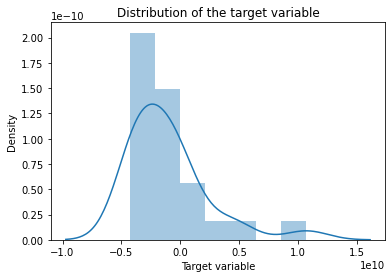

Number of rows after removing outliers: 24


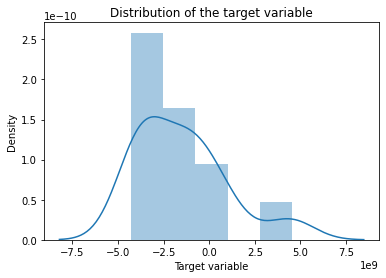

     Train and test data saved.
-------------------------//----------------------------
Dataset: NetCashProvidedByUsedInInvestingActivities
Number of outliers: 2


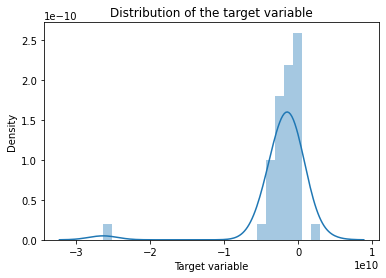

Number of rows after removing outliers: 39


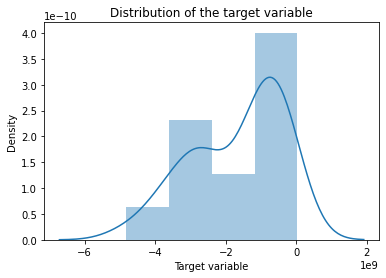

     Train and test data saved.
-------------------------//----------------------------
Dataset: EBIT
Number of outliers: 0


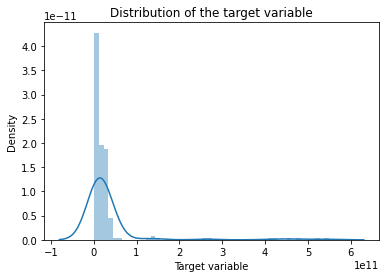

Number of rows after removing outliers: 933


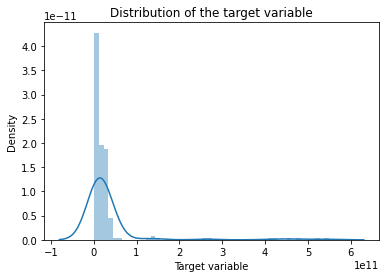

     Train and test data saved.
-------------------------//----------------------------
Dataset: NetIncomeLoss
Number of outliers: 1503


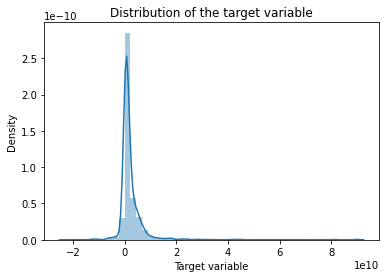

Number of rows after removing outliers: 11395


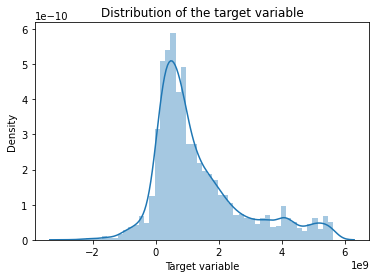

     Train and test data saved.
-------------------------//----------------------------
Dataset: RevenueFromContractWithCustomerExcludingAssessedTax
Number of outliers: 971


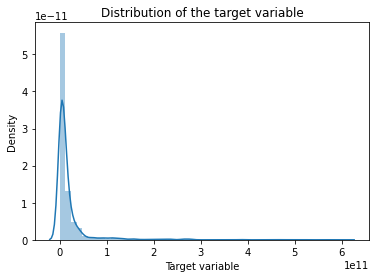

Number of rows after removing outliers: 7879


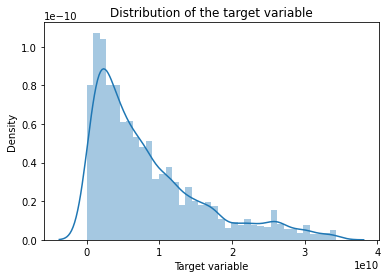

     Train and test data saved.
-------------------------//----------------------------
Dataset: EarningsPerShareDiluted
Number of outliers: 27


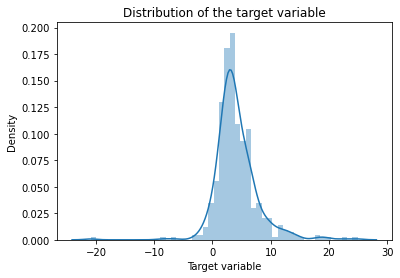

Number of rows after removing outliers: 443


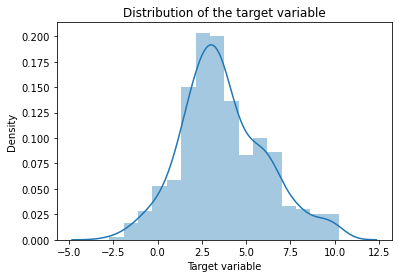

     Train and test data saved.
-------------------------//----------------------------


In [24]:
# Loop through all csv files
for file in all_files:
    # Read csv file
    df = pd.read_csv(path + file)
    
    # Set name for file
    file_name = file.split('.')[0]
    
    print(f"Dataset: {file_name}")
    
    # Preprocess text
    data = df['val']

    # Calculate quartiles
    q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
    iqr = q75 - q25

    # Define the outlier boundaries
    lower_bound = q25 - (1.5 * iqr)
    upper_bound = q75 + (1.5 * iqr)

    # Identify outliers using IQR
    outliers = np.where((data < lower_bound) | (data > upper_bound))[0]
    
    print("Number of outliers:", len(outliers))

    # Plot the distribution of the target variable
    sns.distplot(data)
    plt.title('Distribution of the target variable')
    plt.xlabel('Target variable')
    plt.ylabel('Density')
    plt.show()
    
    # Remove outliers
    df.drop(outliers, inplace=True)
    df.reset_index(drop=True, inplace=True)
    print("Number of rows after removing outliers:", len(df))
    
    # Plot the distribution of val after removing outliers
    sns.distplot(df['val'])
    plt.title('Distribution of the target variable')
    plt.xlabel('Target variable')
    plt.ylabel('Density')
    plt.show()
    
     # Train test split
    df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

    # Save train and test data
    df_train.to_csv('../datasets/distilbert_data/train/' + file_name + '_train.csv', index=False)
    df_test.to_csv('../datasets/distilbert_data/test/' + file_name + '_test.csv', index=False)
    print("     Train and test data saved.")
    
    print("-------------------------//----------------------------")

Dataset: NetCashProvidedByUsedInFinancingActivities
Number of outliers: 1


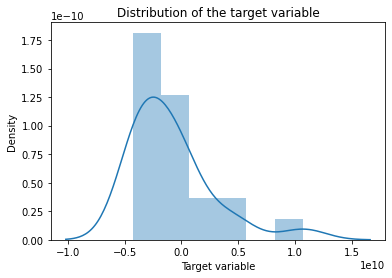

Number of rows after removing outliers: 21


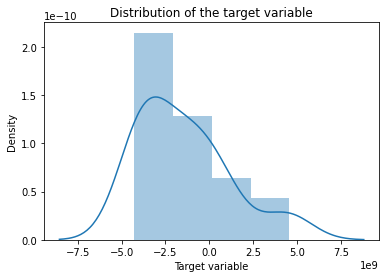

     Train and test data saved.
-------------------------//----------------------------
Dataset: NetCashProvidedByUsedInInvestingActivities
Number of outliers: 2


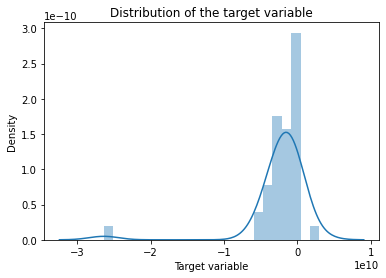

Number of rows after removing outliers: 38


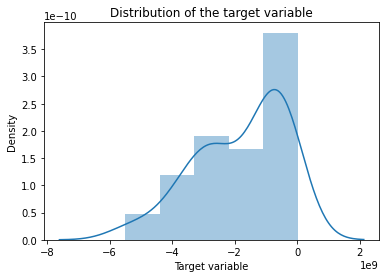

     Train and test data saved.
-------------------------//----------------------------
Dataset: EBIT
Number of outliers: 0


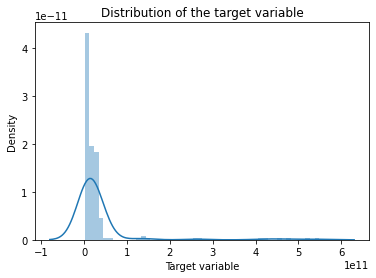

Number of rows after removing outliers: 936


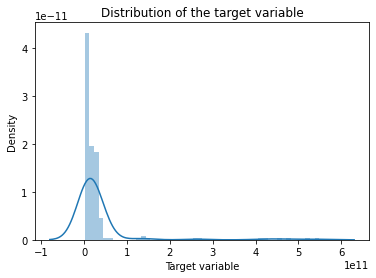

     Train and test data saved.
-------------------------//----------------------------
Dataset: NetIncomeLoss
Number of outliers: 1505


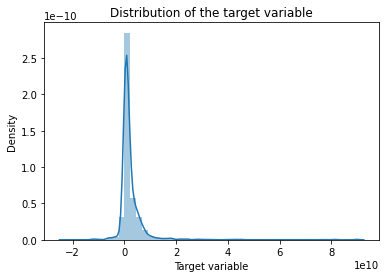

Number of rows after removing outliers: 11505


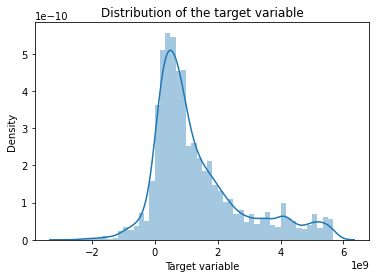

     Train and test data saved.
-------------------------//----------------------------
Dataset: RevenueFromContractWithCustomerExcludingAssessedTax
Number of outliers: 951


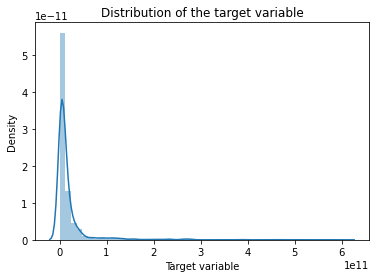

Number of rows after removing outliers: 7872


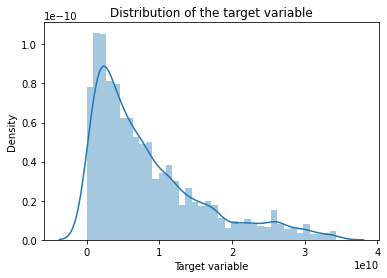

     Train and test data saved.
-------------------------//----------------------------
Dataset: EarningsPerShareDiluted
Number of outliers: 27


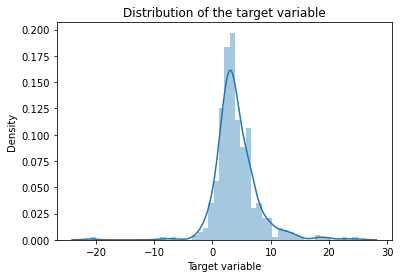

Number of rows after removing outliers: 444


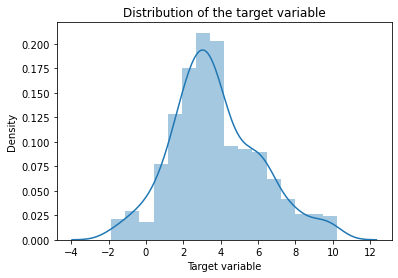

     Train and test data saved.
-------------------------//----------------------------


In [6]:
# Loop through all csv files
for file in finbert_files:
    # Read csv file
    df = pd.read_csv(path + file)
    
    # Set name for file
    file_name = file.split('.')[0]
    
    print(f"Dataset: {file_name}")
    
    # Preprocess text
    data = df['val']

    # Calculate quartiles
    q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
    iqr = q75 - q25

    # Define the outlier boundaries
    lower_bound = q25 - (1.5 * iqr)
    upper_bound = q75 + (1.5 * iqr)

    # Identify outliers using IQR
    outliers = np.where((data < lower_bound) | (data > upper_bound))[0]
    
    print("Number of outliers:", len(outliers))

    # Plot the distribution of the target variable
    sns.distplot(data)
    plt.title('Distribution of the target variable')
    plt.xlabel('Target variable')
    plt.ylabel('Density')
    plt.show()
    
    # Remove outliers
    df.drop(outliers, inplace=True)
    df.reset_index(drop=True, inplace=True)
    print("Number of rows after removing outliers:", len(df))
    
    # Plot the distribution of val after removing outliers
    sns.distplot(df['val'])
    plt.title('Distribution of the target variable')
    plt.xlabel('Target variable')
    plt.ylabel('Density')
    plt.show()
    
     # Train test split
    df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

    # Save train and test data
    df_train.to_csv('../datasets/finbert_data/train/' + file_name + '_train.csv', index=False)
    df_test.to_csv('../datasets/finbert_data/test/' + file_name + '_test.csv', index=False)
    print("     Train and test data saved.")
    
    print("-------------------------//----------------------------")